In [3]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [4]:
#Access INFLATION RATE for CHINA
url_1 = 'https://fred.stlouisfed.org/series/FPCPITOTLZGCHN/downloaddata/FPCPITOTLZGCHN.csv'
data_1 = pd.read_csv(url_1, parse_dates=True)
data_1.head()

,DATE,VALUE
0,1987-01-01,7.233836
1,1988-01-01,18.811818
2,1989-01-01,18.245638
3,1990-01-01,3.052290
4,1991-01-01,3.556686


In [49]:
data_1.columns=['DATE','INFLATION']
data_1.head()

,DATE,INFLATION
0,1987-01-01,7.233836
1,1988-01-01,18.811818
2,1989-01-01,18.245638
3,1990-01-01,3.052290
4,1991-01-01,3.556686


In [7]:
#Summary Statistics for INFLATION RATE
data_1.describe()

,INFLATION
count,33.000000
mean,5.044244
std,6.340551
min,-1.401474
25%,1.593137
50%,2.786468
75%,5.925255
max,24.256984


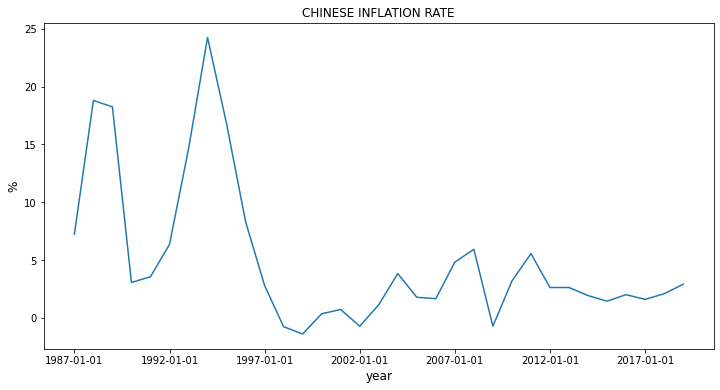

In [12]:
#Graphing the CHINESE INFLATION RATE
data1=data_1.set_index('DATE')
ax = data1['1987':'2020'].plot(title='CHINESE INFLATION RATE', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()


In [70]:
#Access INTEREST RATE for CHINA
url_2 = 'https://fred.stlouisfed.org/series/INTDSRCNM193N/downloaddata/INTDSRCNM193N.csv'
data_2 = pd.read_csv(url_2, parse_dates=True)
data_2.head()

,DATE,VALUE
0,1990-03-01,9.00
1,1990-04-01,9.00
2,1990-05-01,9.00
3,1990-06-01,9.00
4,1990-07-01,9.00


In [71]:
data_2.columns=['DATE','INTEREST RATE']
data_2.head()
data_2 = pd.DataFrame(data_2)
data_2['INTEREST RATE'] = pd.to_numeric(data_2['INTEREST RATE'], errors='coerce')


In [72]:
#Summary Statistics for INTEREST RATE
data_2.describe()

,INTEREST RATE
count,366.000000
mean,4.695628
std,2.602980
min,2.700000
25%,2.900000
50%,3.250000
75%,7.200000
max,10.440000


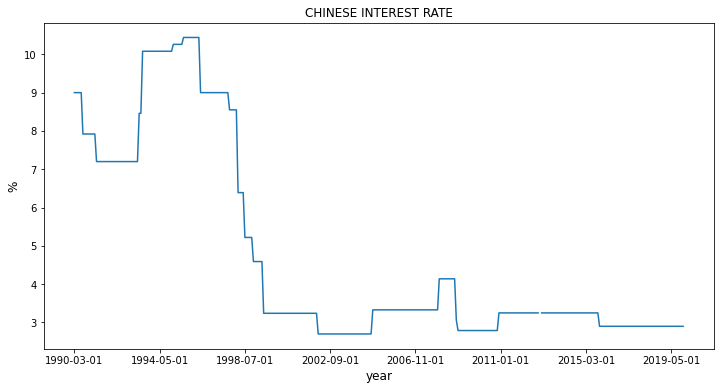

In [73]:
#Graphing the CHINESE INTEREST RATE
data2=data_2.set_index('DATE')
ax = data2['1990':'2020'].plot(title='CHINESE INTEREST RATE', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [74]:
#Access GDP for CHINA
url_3 = 'https://fred.stlouisfed.org/series/MKTGDPCNA646NWDB/downloaddata/MKTGDPCNA646NWDB.csv'
data_3 = pd.read_csv(url_3, parse_dates=True)
data_3.head()

,DATE,VALUE
0,1960-01-01,5.971647e+10
1,1961-01-01,5.005687e+10
2,1962-01-01,4.720936e+10
3,1963-01-01,5.070680e+10
4,1964-01-01,5.970834e+10


In [75]:
data_3.columns=['DATE', 'GDP']
data_3.head()

,DATE,GDP
0,1960-01-01,5.971647e+10
1,1961-01-01,5.005687e+10
2,1962-01-01,4.720936e+10
3,1963-01-01,5.070680e+10
4,1964-01-01,5.970834e+10


In [76]:
#Summary Statistics for GDP
data_3.describe()

,GDP
count,6.000000e+01
mean,2.375291e+12
std,3.947787e+12
min,4.720936e+10
25%,1.482011e+11
50%,3.543130e+11
75%,2.038002e+12
max,1.434290e+13


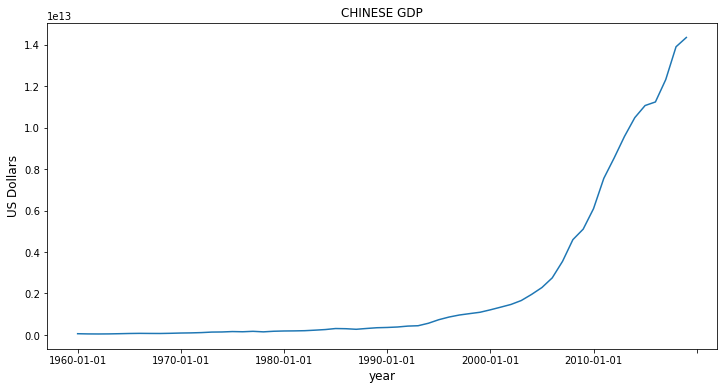

In [77]:
#Graphing the CHINESE GDP
data3=data_3.set_index('DATE')
ax = data3['1960':'2020'].plot(title='CHINESE GDP', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('US Dollars', fontsize=12)
plt.show()

In [80]:
data_merge=pd.merge(data_1, data_2, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [90]:
data_merge['REAL INTEREST RATE']=data_merge['INTEREST RATE']-data_merge['INFLATION']
data_merge.head()

,DATE,INFLATION,INTEREST RATE,REAL INTEREST RATE
0,1991-01-01,3.556686,7.92,4.363314
1,1992-01-01,6.353981,7.20,0.846019
2,1993-01-01,14.610079,7.20,-7.410079
3,1994-01-01,24.256984,10.08,-14.176984
4,1995-01-01,16.791227,10.26,-6.531227


In [93]:
#Summary statistics of REAL INTEREST RATE
data_merge['REAL INTEREST RATE'].describe()

count    29.000000
mean      0.648398
std       4.407025
min     -14.176984
25%      -0.385328
50%       1.306863
75%       2.520868
max       9.323182
Name: REAL INTEREST RATE, dtype: float64

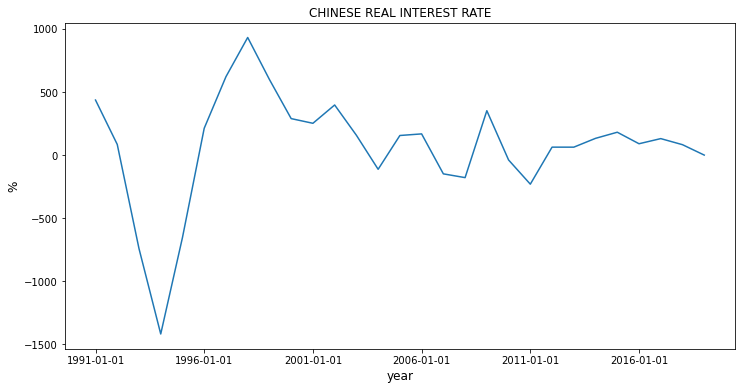

In [95]:
#Graphing the CHINESE REAL INTEREST RATE
data_merge1=data_merge[['DATE','REAL INTEREST RATE']]
data_merge1=data_merge1.set_index('DATE')
data_merge1['REAL INTEREST RATE']=data_merge1['REAL INTEREST RATE']*100
ax = data_merge1['1991':'2020'].plot(title='CHINESE REAL INTEREST RATE', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [96]:
data_merge_2=pd.merge(data_merge, data_3, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [97]:
data_merge_2.head()

,DATE,INFLATION,INTEREST RATE,REAL INTEREST RATE,GDP
0,1991-01-01,3.556686,7.92,4.363314,3.833733e+11
1,1992-01-01,6.353981,7.20,0.846019,4.269157e+11
2,1993-01-01,14.610079,7.20,-7.410079,4.447313e+11
3,1994-01-01,24.256984,10.08,-14.176984,5.643247e+11
4,1995-01-01,16.791227,10.26,-6.531227,7.345479e+11


In [98]:
data_merge_2.fillna(0)

,DATE,INFLATION,INTEREST RATE,REAL INTEREST RATE,GDP
0,1991-01-01,3.556686,7.92,4.363314,3.833733e+11
1,1992-01-01,6.353981,7.20,0.846019,4.269157e+11
2,1993-01-01,14.610079,7.20,-7.410079,4.447313e+11
3,1994-01-01,24.256984,10.08,-14.176984,5.643247e+11
4,1995-01-01,16.791227,10.26,-6.531227,7.345479e+11
5,1996-01-01,8.313153,10.44,2.126847,8.637467e+11
6,1997-01-01,2.786468,9.00,6.213532,9.616040e+11
7,1998-01-01,-0.773182,8.55,9.323182,1.029043e+12
8,1999-01-01,-1.401474,4.59,5.991474,1.093997e+12
9,2000-01-01,0.347806,3.24,2.892194,1.211347e+12


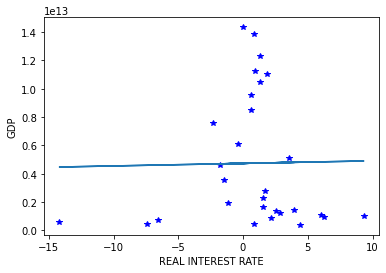

In [100]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge_2['REAL INTEREST RATE'],data_merge_2['GDP'],'b*')
ax.set_xlabel("REAL INTEREST RATE")
ax.set_ylabel("GDP")
b,m=polyfit(data_merge_2['REAL INTEREST RATE'],data_merge_2['GDP'],1)
ax.plot(data_merge_2['REAL INTEREST RATE'],b+m*data_merge_2['REAL INTEREST RATE'],'-')

In [101]:
#Test for the relationship between INTEREST RATE and GDP
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge_2['GDP'], data_merge_2['REAL INTEREST RATE'])
gradient, intercept, std_err, p_value

(1.6250825857275186e-14,
 0.5713559924728433,
 1.8240842395026628e-13,
 0.9296676909964148)

In [102]:
#Regression of unemployment rate on INTEREST RATE and GDP.
data_merge_2['const'] = 1
reg1 = sm.OLS(endog=data_merge_2['REAL INTEREST RATE'], exog=data_merge_2[['const', 'REAL INTEREST RATE','GDP']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [103]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [104]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     REAL INTEREST RATE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.980e+08
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           4.22e-94
Time:                        00:29:01   Log-Likelihood:                 156.16
No. Observations:                  29   AIC:                            -306.3
Df Residuals:                      26   BIC:                            -302.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0011      0